# Regression Models

## Importing libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


## Loading the dataset
Here we are going to load the dataset by using the github of scikit learn to avoid dragging paths every time. 

In [2]:
url = "https://github.com/scikit-learn/scikit-learn/raw/refs/heads/main/sklearn/datasets/data/boston_house_prices.csv"
df_boston = pd.read_csv(url, skiprows=1)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Exploring data
We will check if we have the missing values, the outliers. 

In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The variable such as CHAS, RAD was the categorical vars and are already encoded. There is no missing values. Throught the visualisation of boxplot, we can visualise if we have outliers or something which seems wrong.

In [4]:
def plot_numeric_distributions(df):

    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

   # Set up the size of the plot grid
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1  # 3 plots per row

    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * num_rows))
    
    # Loop through each numeric column and create a distribution plot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(df[col])
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

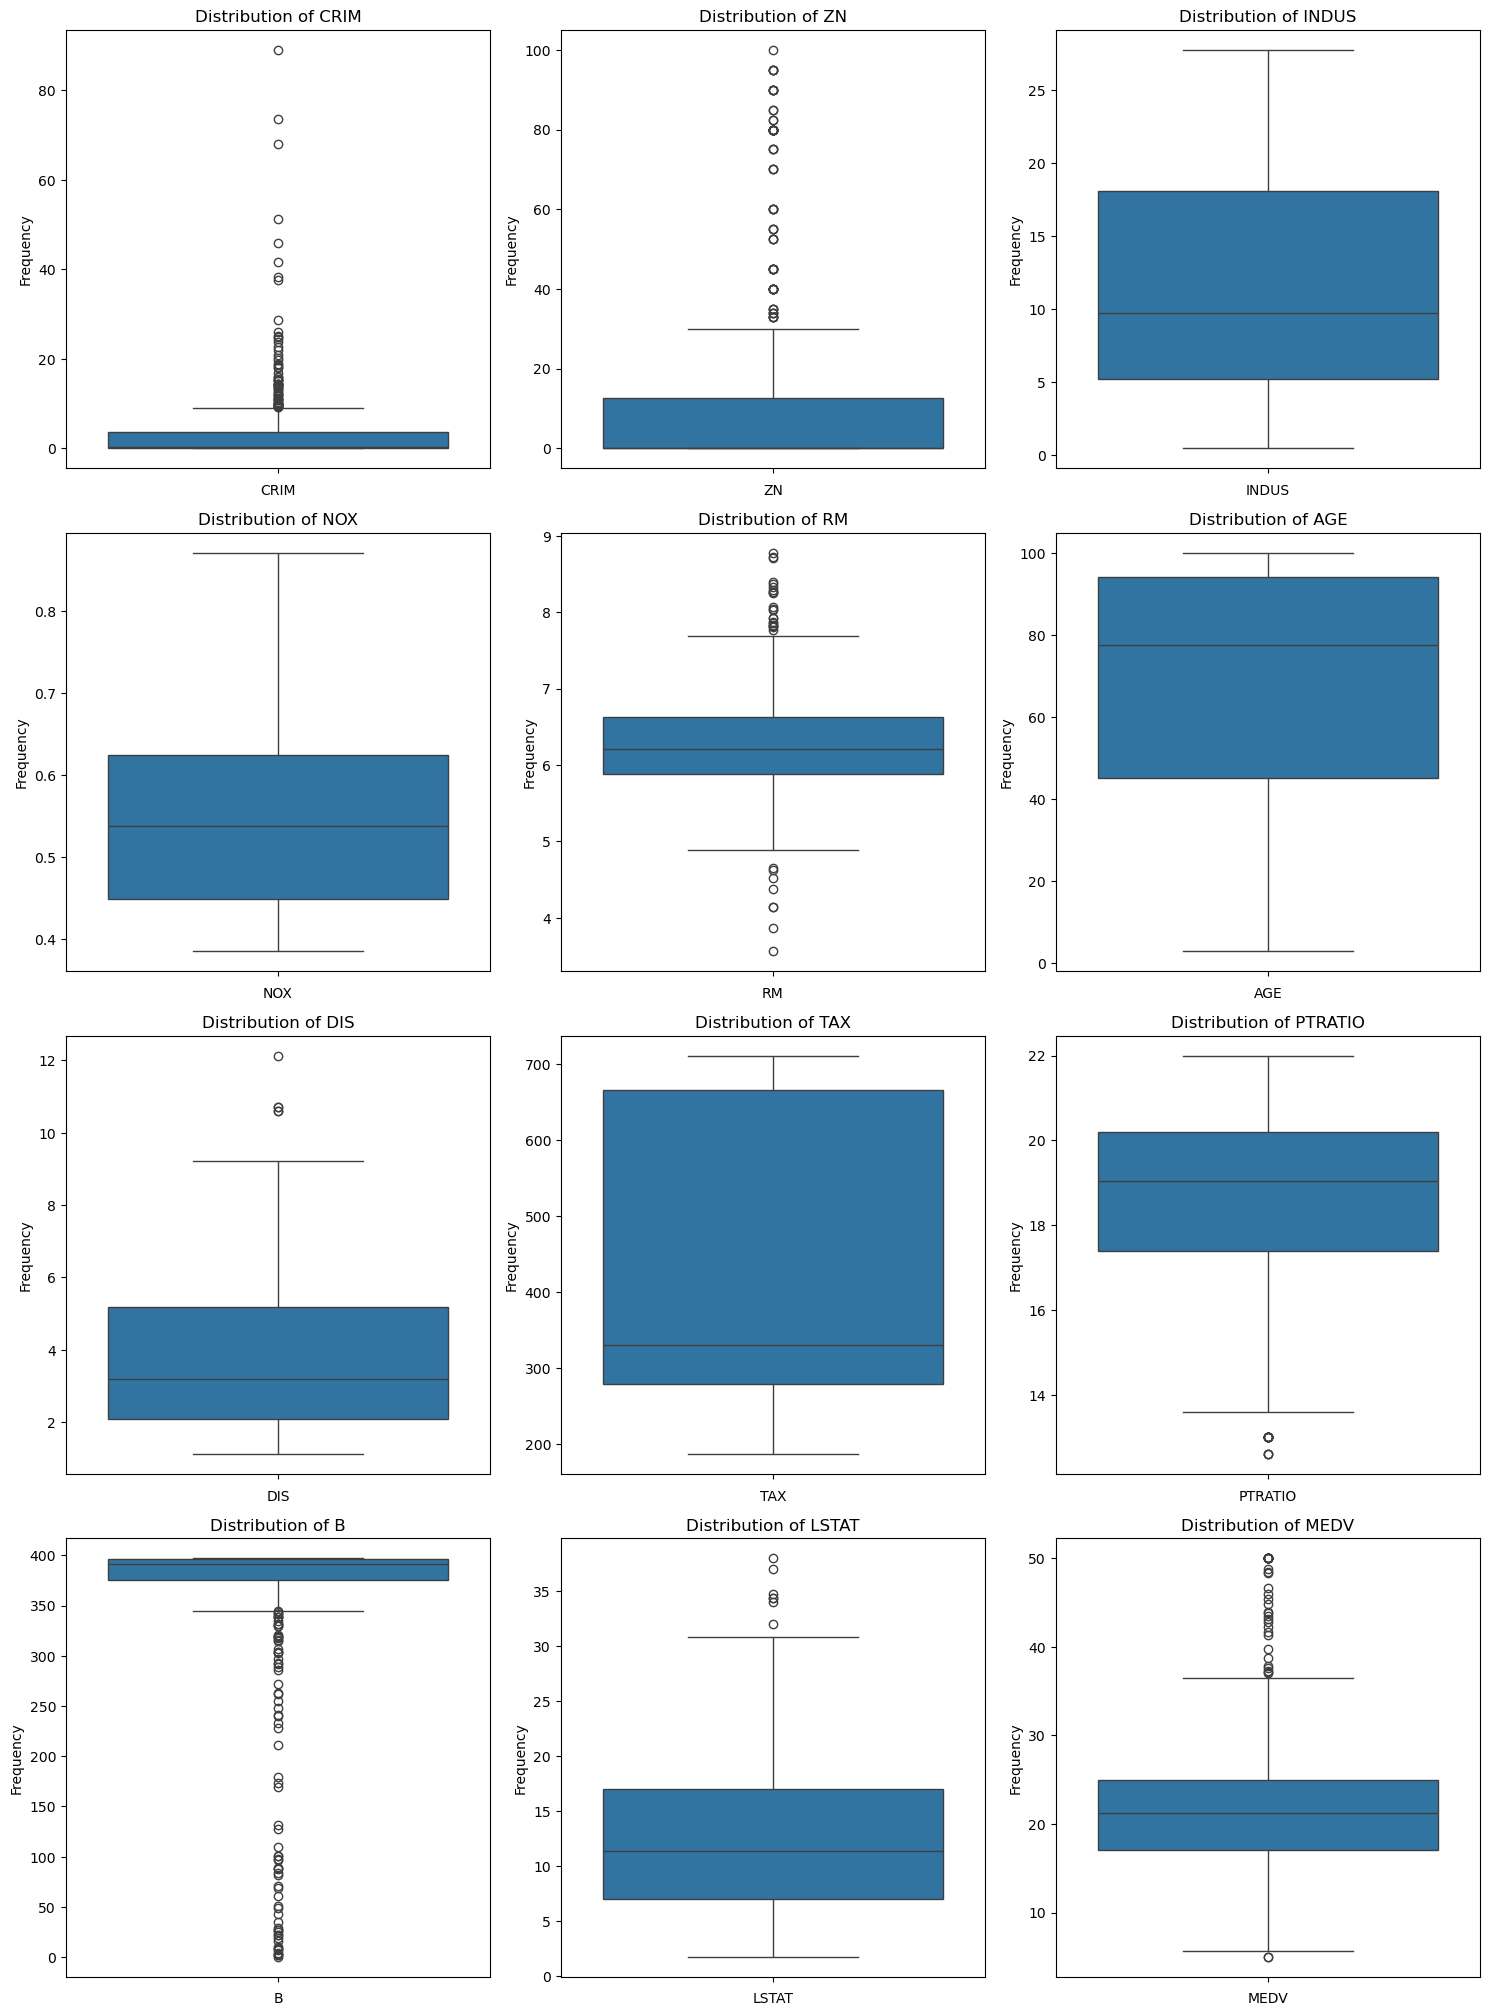

In [5]:
plot_numeric_distributions(df_boston.drop(["CHAS","RAD"],axis=1))

Let's look the histogram of the variables in order to know if we have the vars normally distributed.

In [6]:
def plot_barcharts(df, max_unique=30):
     # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

   # Set up the size of the plot grid
    num_cols = len(numeric_cols)
    num_rows = (num_cols // 3) + 1  # 3 plots per row

    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * num_rows))
    
    # Loop through each numeric column and create a distribution plot
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(df[col], color="Blue", bins=30, kde=True)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

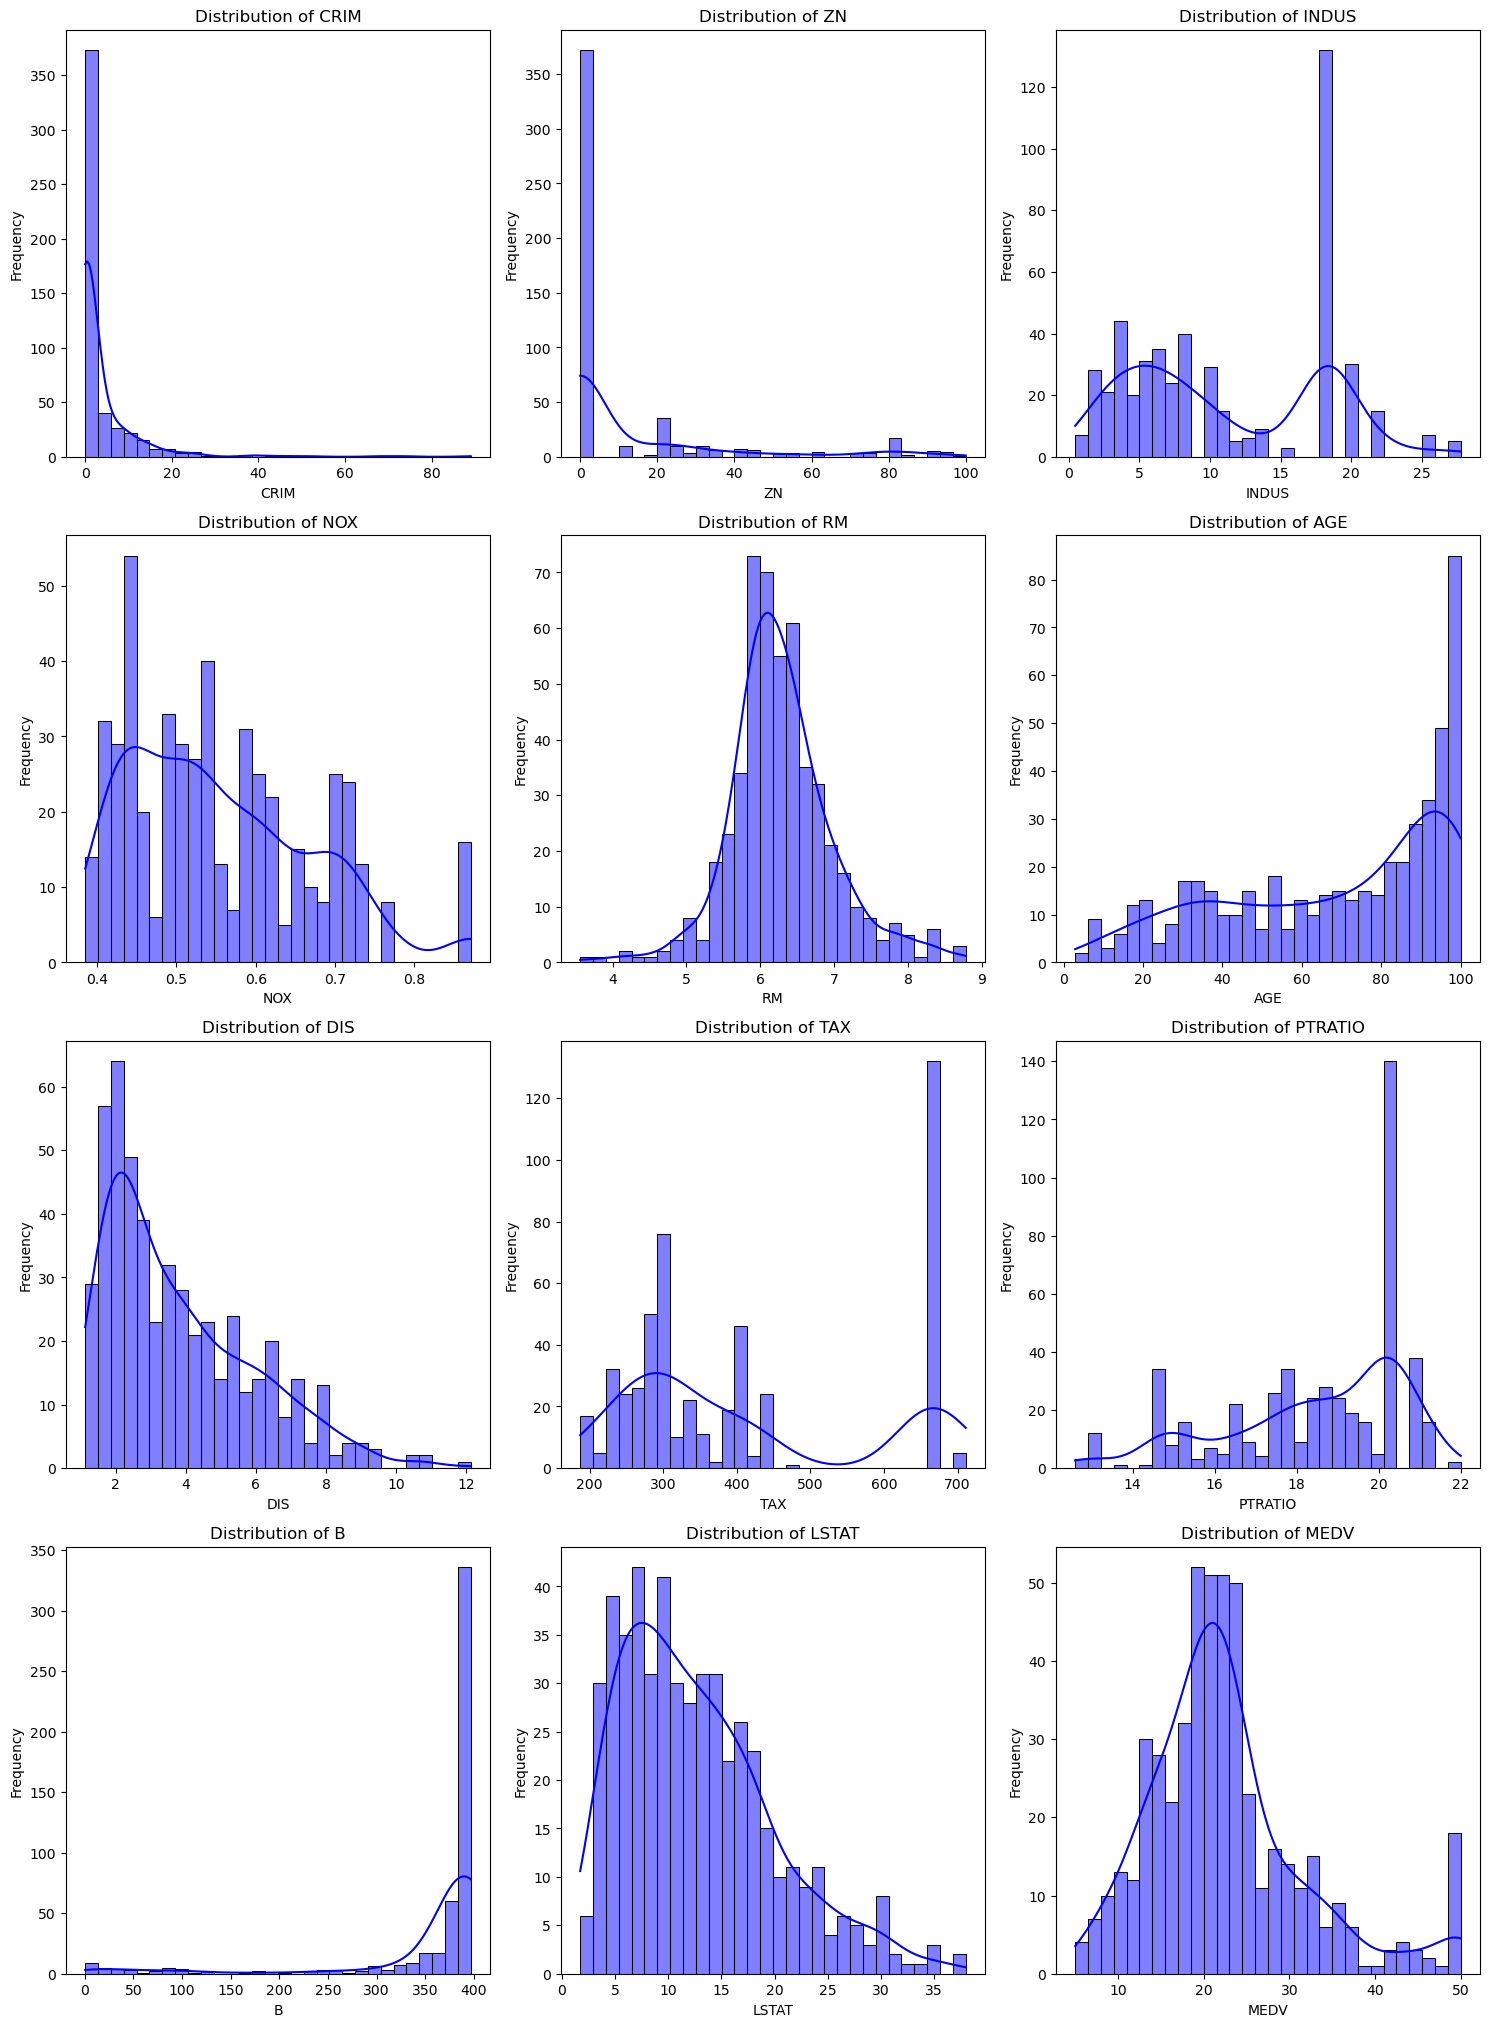

In [7]:
plot_barcharts(df_boston.drop(['CHAS', 'RAD'], axis=1))

We have a lot of asymetric distribution except the distribution of MEDV and RM. This asymetry can pertubate our linear model, because, the linear regression suppose a normal distribution of vars. To handle these asymetry, we can log transform our data in order to improve the quality of the data. 
Here, the goal is to compare four model. The linear model and decision tree without transformation and these one with transformation.
Let's check the colinearity of variables. 

In [8]:
cols_exclues = ["CHAD", "RAD", "MEDV","RM"]

df_transformed = df_boston.copy()  
df_transformed[df_boston.columns.difference(cols_exclues)] = np.log1p(df_boston[df_boston.columns.difference(cols_exclues)] + 1)

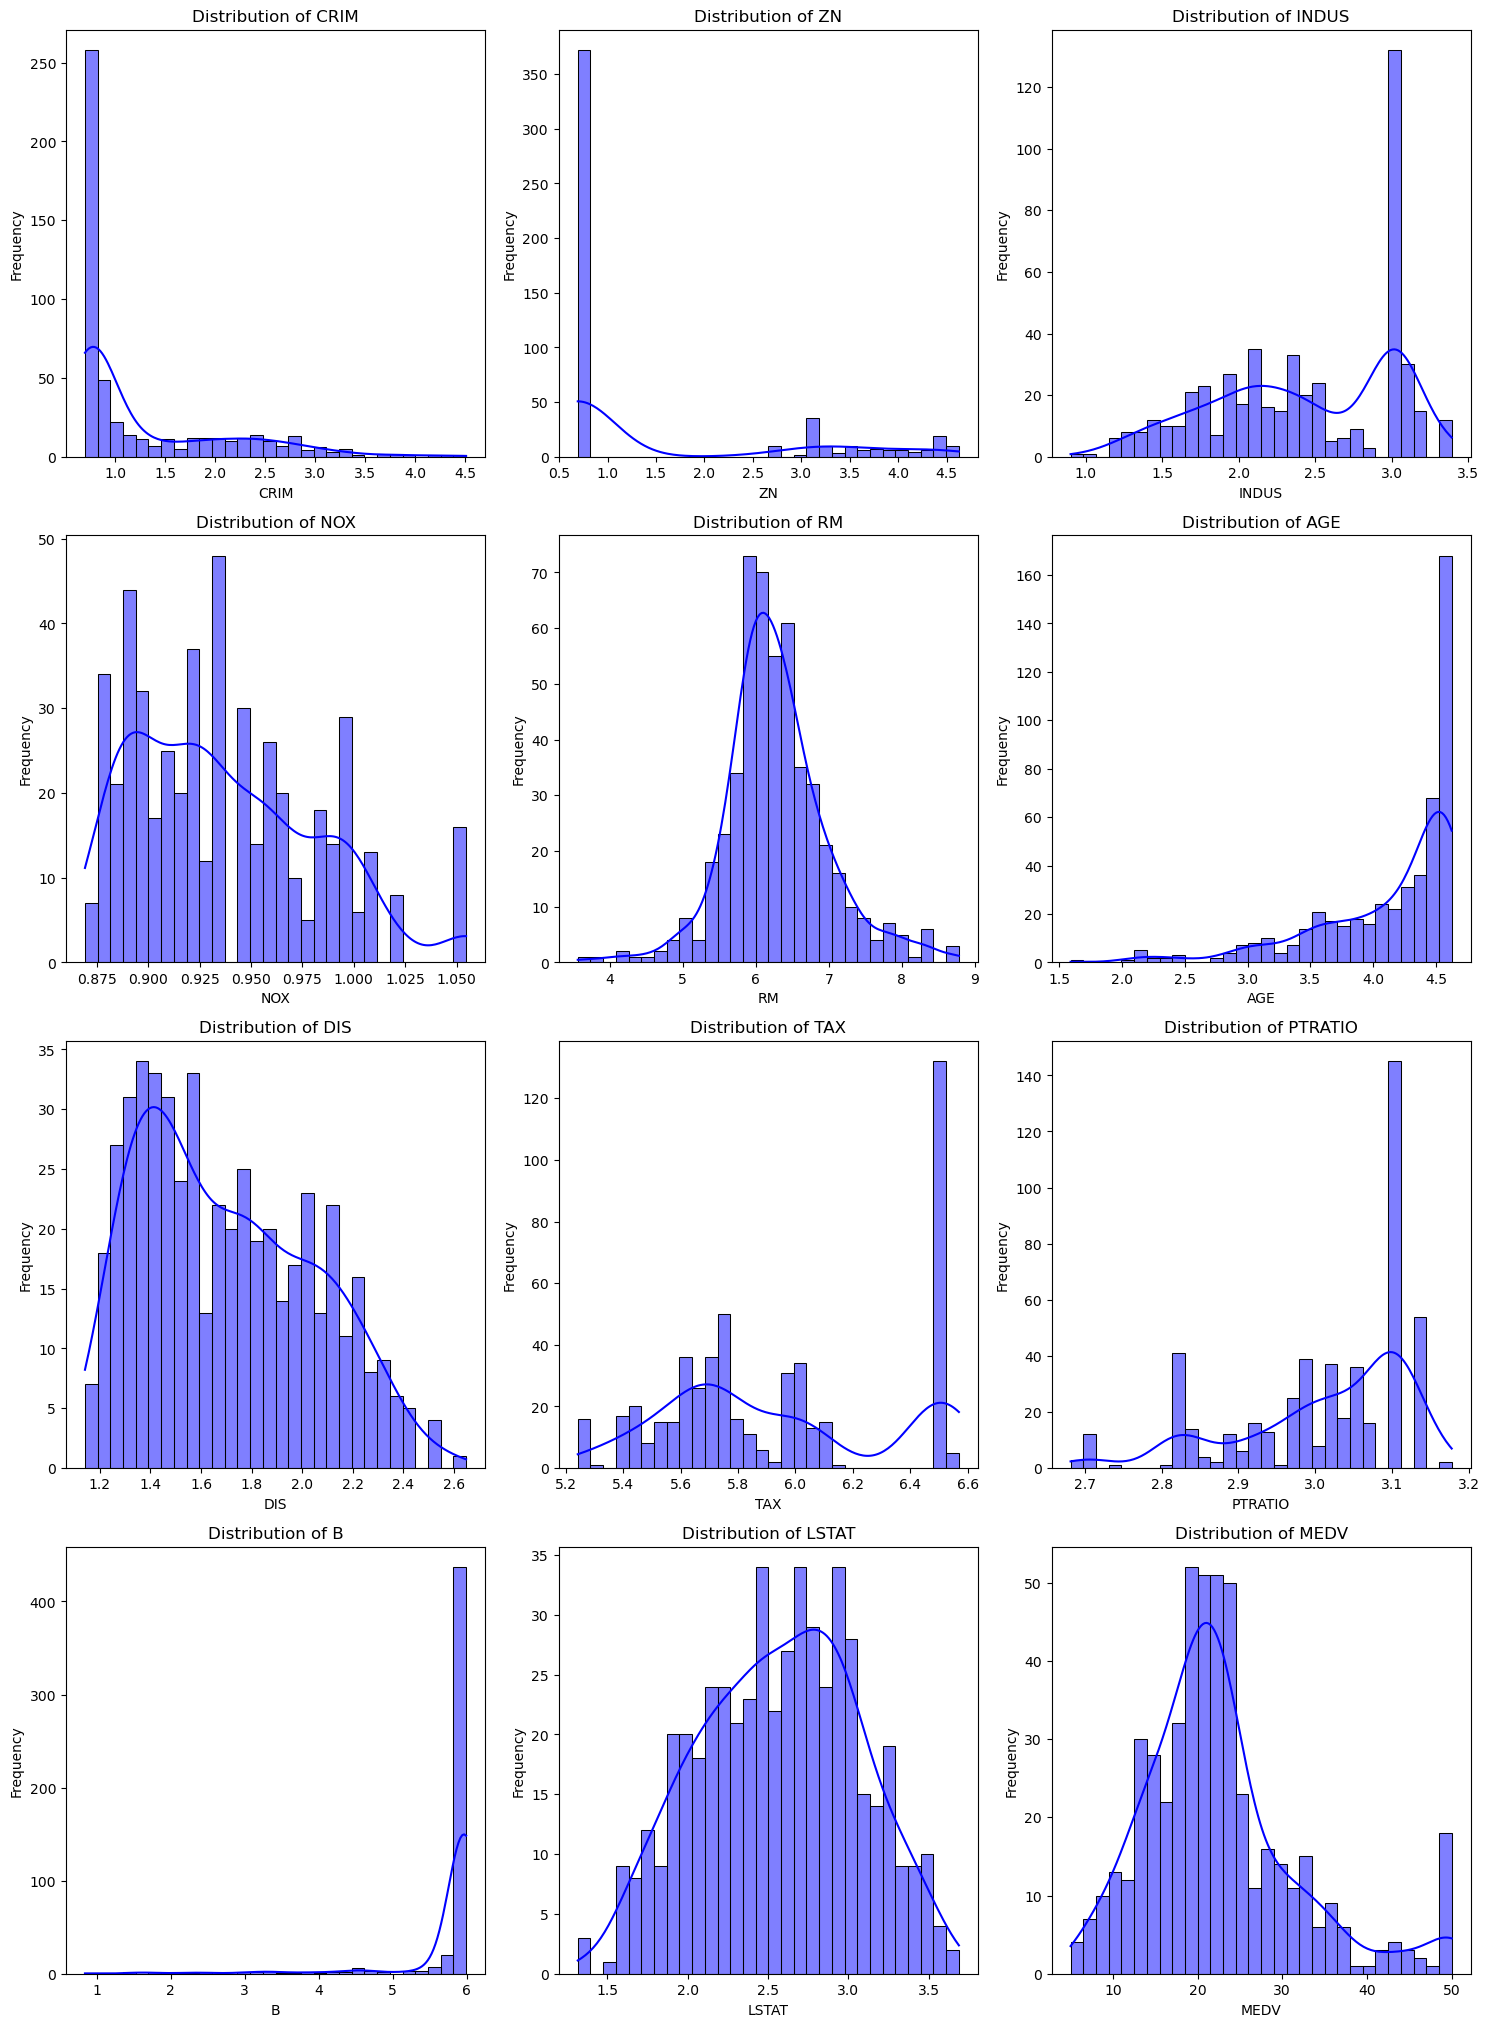

In [9]:
plot_barcharts(df_transformed.drop(["CHAS", "RAD"], axis=1))

Now, Let's check the colinearity of variables. 

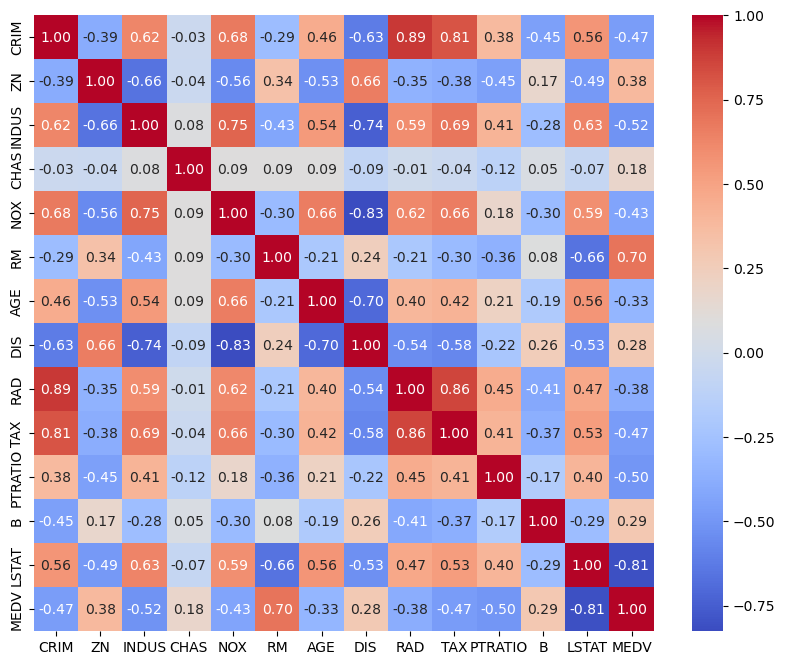

In [10]:
corr_matrix = df_transformed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

We denote a string correlation between LSTAT and MEDV and also MEDV and RM. That's good but we can have multicolinearity bias in our model. We have to handle this also. To be sure that we have multicolinarity between our vars, we will measure it by using the VIF. 

The VIF measures how much the variance of a coefficient is increased due to multicollinearity. 
If VIF > 5 (sometimes 10), the variable is highly collinear with the others and may pose a problem.


In [11]:
# Two ways to perform the VIF, the automatic way by using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df_transformed.drop(columns=["MEDV"]) 
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,5948.425265
1,CRIM,6.689042
2,ZN,2.521720
3,INDUS,4.034667
4,CHAS,1.085374
5,NOX,4.787570
6,RM,2.081356
7,AGE,2.442738
8,DIS,4.890369
9,RAD,8.240628


In [12]:
# The second way is manually
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
vifdf = []
df_transformed_vif = df_transformed.drop(columns=["MEDV"])
for i in df_transformed_vif.columns:
    X = np.array(df_transformed.drop(i,axis=1))
    y = np.array(df_transformed[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.107311
11,B,1.309415
10,PTRATIO,2.165903
5,RM,2.271158
6,AGE,2.446251
1,ZN,2.524766
2,INDUS,4.043627
12,LSTAT,4.842201
4,NOX,5.028112
9,TAX,5.267478


From the two ways, we obtain almost similarly result. We note a VIF > 5 for CRIM, RAD, DIS, TAX. We need to take action against these ones. One possibility is to remove one of them.
Another possibility is to perform a PCA. As you know, the PCA can not only reduce the dimensions by select the main components but also decorellate our vars.
Other possibility is to perform Ridge model in order to reduce the impact corealated vars.

I decided to do a PCA. 
Before to do a PCA, we need to do a standardisation in order to have all vars with std = 1 and the mean = 0

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed.drop("MEDV", axis=1))

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

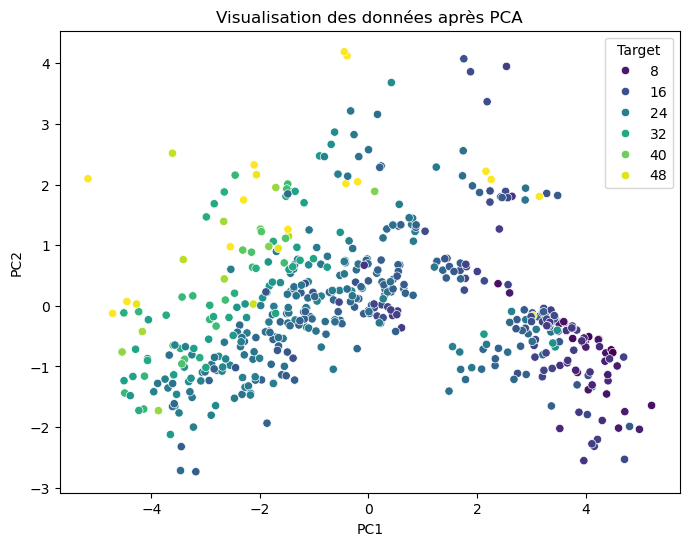

In [14]:
df_pca = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_pca["Target"] = df_transformed["MEDV"] 

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Target", palette="viridis")
plt.title("Visualisation des données après PCA")
plt.show()

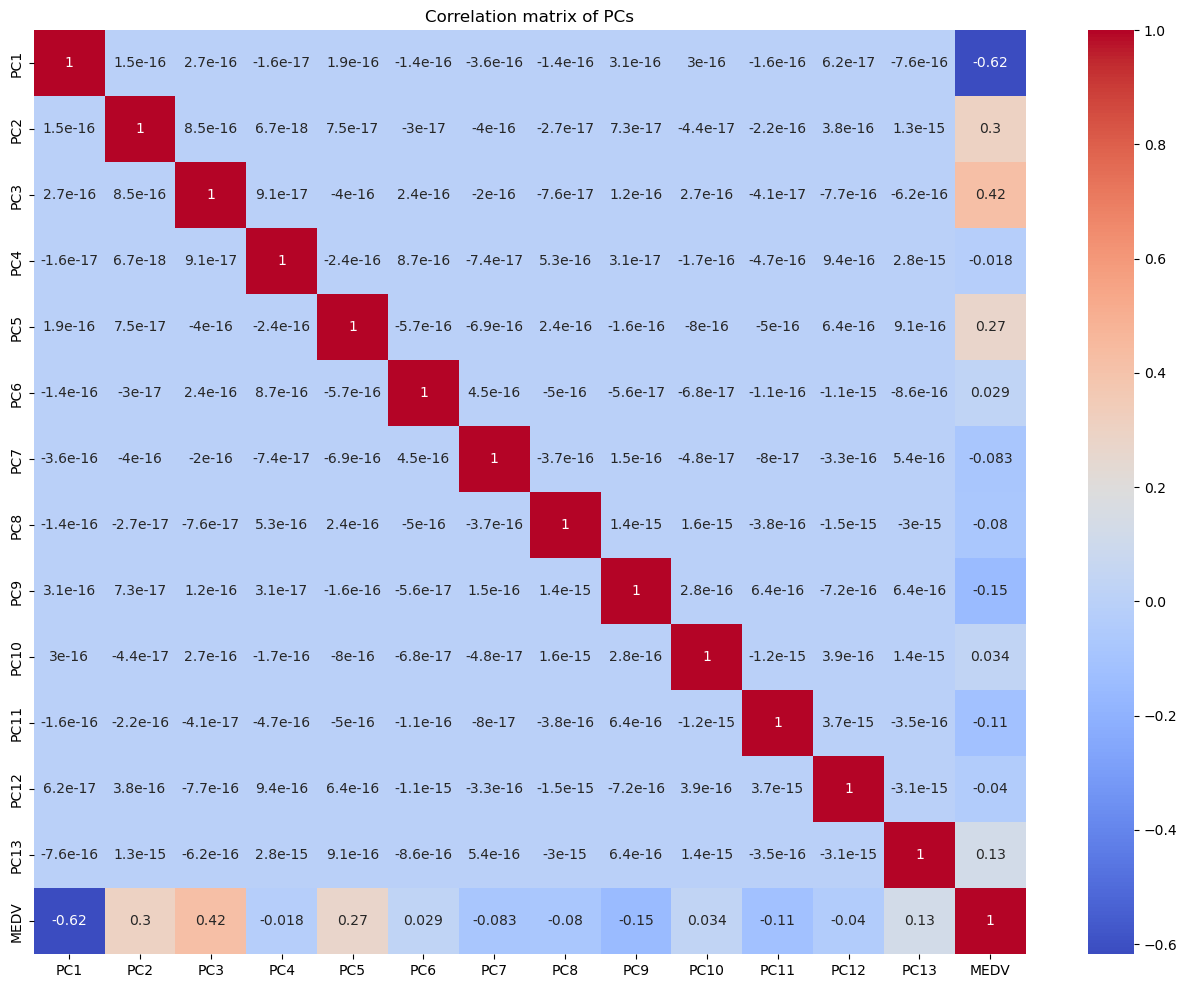

In [15]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_df["MEDV"] = df_transformed["MEDV"]
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(X_pca_df.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title("Correlation matrix of PCs")
plt.show()

As you can see there is no correlation between predictor variables, thus removing multicollinearity.
The reason correlation between predictor variable and target varaiable is in sorted order is because, PCA takes all the explained variation and puts it into first components, and repeats the process. The new feature are in no way related to the old ones, therefore it would be wrong to use the same name for them.

Now, the modeling.

## Modeling



### Linear Model

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
X = (df_boston.drop("MEDV", axis=1))
y = df_boston["MEDV"]

In [18]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Create and train model 
model = LinearRegression() 
model.fit(X_train, y_train) 
# Make predictions 
y_pred = model.predict(X_test) 
# Evaluate 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse:.2f}') 

print(f'R-squared: {r2:.2f}')

Mean Squared Error: 24.29
R-squared: 0.67


In [19]:
# Split train/test
X_train, X_test = train_test_split(X_pca, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluation
# Evaluate 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse:.2f}') 

print(f'R-squared: {r2:.2f}')

Mean Squared Error: 18.32
R-squared: 0.75


### Decision trees

In [20]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error 
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Create and train the decision tree regressor 
regressor = DecisionTreeRegressor(max_depth=5, random_state=42) 
regressor.fit(X_train, y_train) 
# Make predictions 
y_pred = regressor.predict(X_test) 
# Calculate the mean squared error 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse:.2f}') 
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 8.55
Root Mean Squared Error: 2.92
R-squared: 0.88


In [21]:
# Create and train the decision tree regressor 
X_train, X_test= train_test_split(X_pca, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(max_depth=5, random_state=42) 
regressor.fit(X_train, y_train) 
# Make predictions 
y_pred = regressor.predict(X_test) 
# Calculate the mean squared error 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse:.2f}') 
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 42.77
Root Mean Squared Error: 6.54
R-squared: 0.42


## Comparison 

/var/folders/n6/75yk6y3d0fb0_b6k89_5kv8r0000gn/T/ipykernel_62623/1878175569.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=metrics_df, ax=axes[0], palette="Blues_d")
/var/folders/n6/75yk6y3d0fb0_b6k89_5kv8r0000gn/T/ipykernel_62623/1878175569.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=metrics_df, ax=axes[1], palette="Blues_d")


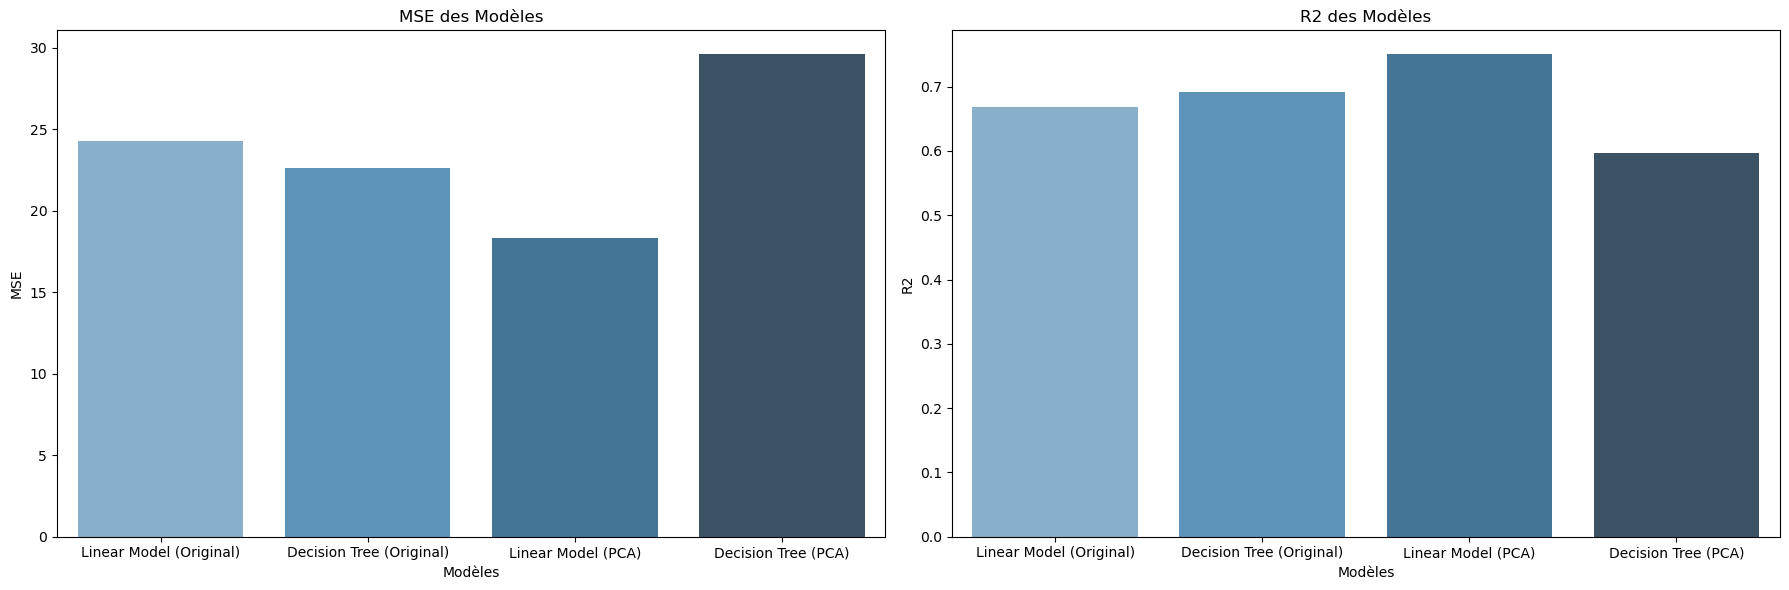

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_PCA, X_test_PCA= train_test_split(X_pca, test_size=0.2, random_state=42)

models = {
    "Linear Model (Original)": LinearRegression(),
    "Decision Tree (Original)": DecisionTreeRegressor(),
    "Linear Model (PCA)": LinearRegression(),
    "Decision Tree (PCA)": DecisionTreeRegressor()
}

metrics = {
    "Model": [],
    "MSE": [],
    "R2": []
}

for name, model in models.items():
    if "PCA" in name: 
        model.fit(X_train_PCA, y_train)
        y_pred = model.predict(X_test_PCA)
    else: 
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    metrics["Model"].append(name)
    metrics["MSE"].append(mse)
    metrics["R2"].append(r2)


metrics_df = pd.DataFrame(metrics)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.barplot(x="Model", y="MSE", data=metrics_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("MSE des Modèles")
axes[0].set_xlabel("Modèles")
axes[0].set_ylabel("MSE")


sns.barplot(x="Model", y="R2", data=metrics_df, ax=axes[1], palette="Blues_d")
axes[1].set_title("R2 des Modèles")
axes[1].set_xlabel("Modèles")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show()


After all, it appears that the linear model without PCA is not more better than the Decision tree without PCA.
But the opposite occurs with PCA.
 

 The choice of the best model depend of the variables and their quality.


# Classification Models
For this model, we will use another dataset. The IRIS dataset.

In [23]:

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/sedjrokoffiromulusakonakpo/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [24]:
iris_df=pd.read_csv(path+"/IRIS.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Let's start the cleaning of the data

In [25]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Apparently, we don't have missing value in our data. That's good. From our previous experience, i know that if i gon further in the data, i can improve my result.
But, it's a bit different. We are in present of classification data. We will compare again the methodology as we did for regression problem. 

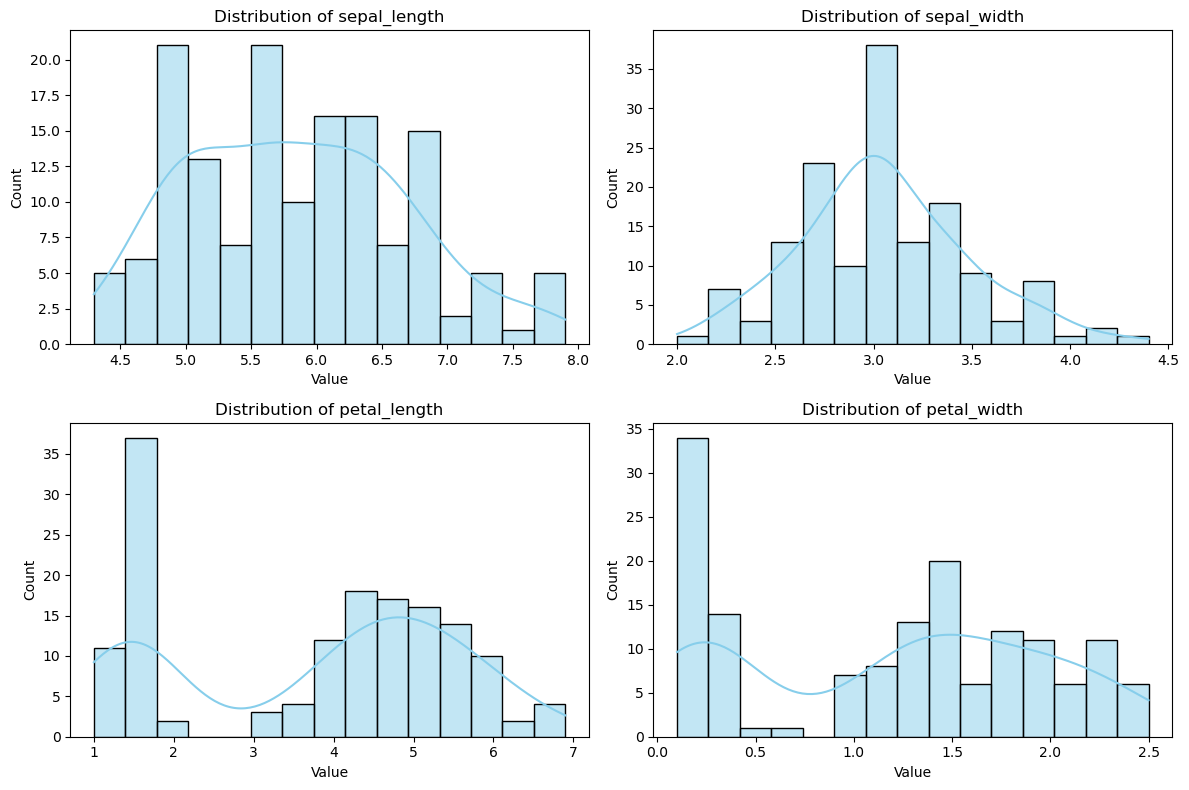

In [26]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

for i, col in enumerate(num_cols):
    ax = axes[i // 2, i % 2]  # Placement en grille
    sns.histplot(iris_df[col], bins=15, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

Our numerical feature are not perfectly normally distributed. But, it doesn't matter, i think. We can continue with this. Now, let's see a pairplot of all features. 

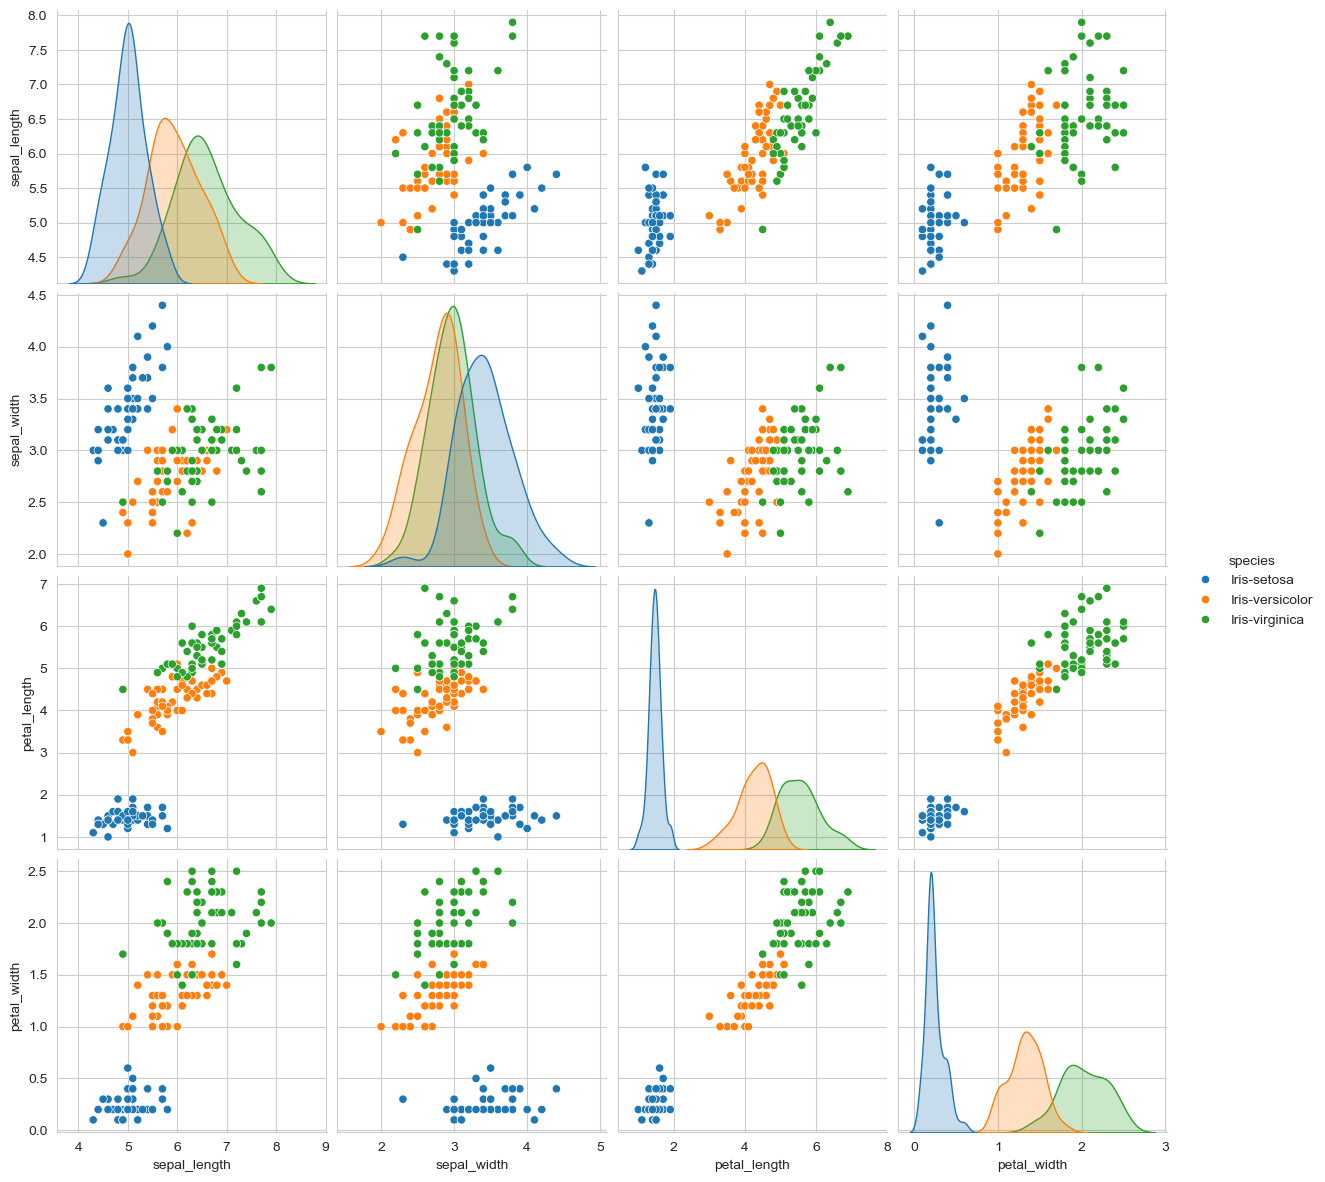

In [27]:
sns.set_style('whitegrid')
sns.pairplot(iris_df,hue='species',height=3);
plt.show()

Here, it easy to observe iris setosa. Petal.lenght and petal.width are the most useful features to identify various flowers types.

Virginica and Versicolor have some overlap(almost linearly separable)

On the diagonal we can observe the PDF for each feature. 

Let's visualize the correlation between these variables
To see correlation between features and my dependent variable, i have to use Cramer's V. Why, because, my dependent variable is categorical.

In [28]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y) 
    chi2 = chi2_contingency(confusion_matrix)[0] 
    n = confusion_matrix.sum().sum()  
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Computing of cramer's V 
cramers_v_values = {col: cramers_v(iris_df[col], iris_df['species']) for col in num_cols}



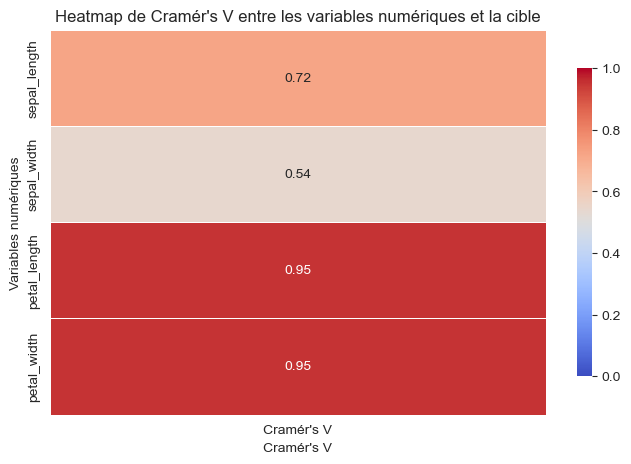

In [29]:
cramers_v_df = pd.DataFrame(cramers_v_values, index=['Cramér\'s V']).T

plt.figure(figsize=(8, 5))
sns.heatmap(cramers_v_df, annot=True, cmap="coolwarm", linewidths=0.5, vmin=0, vmax=1, cbar_kws={'shrink': 0.8})
plt.title("Heatmap de Cramér's V entre les variables numériques et la cible")
plt.ylabel("Variables numériques")
plt.xlabel("Cramér's V")
plt.show()

Based on the Cramér's V values, we can say :

Petal Length (0.95) and Petal Width (0.95) → Very strongly correlated 


Sepal Length (0.72) → Strongly correlated 


Sepal Width (0.54) → Moderately correlated


Hint : If we're building a classification model, Petal Length and Petal Width are the most important features.

What should you do next?


Let's check the colinearity between feature by computing the VIF, why? Because, the strong correlation can introduce the multicolinearity in my model. 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = iris_df[num_cols]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Feature         VIF
0         const  130.983718
1  sepal_length    7.103113
2   sepal_width    2.099039
3  petal_length   31.397292
4   petal_width   16.141564


Petal Length (VIF = 31.4) and Petal Width (VIF = 16.1) have very high values, suggesting that they are highly collinear.


Sepal Length (VIF = 7.1) is also relatively high, but it’s not as problematic as Petal Length and Petal Width.


Sepal Width (VIF = 2.1) is in the safe range and does not show multicollinearity.

In a prediction model, you will need to address the multicollinearity to avoid issues such as overfitting or unstable model coefficients.
So, we will do a PCA. PCA can help by transforming your features into a smaller number of uncorrelated components while retaining most of the variance in the data.

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Because i want to train logistic regression model, i use one-hot encoding
__Hint__
- Use one-hot encoding if you are using models like: Logistic Regression, Support Vector Machine (SVM), Neural Networks 
- Use label encoding if you are using models like: Random Forest, XGBoost, LightGBM

In [32]:

# Separate the features and target
X = iris_df.drop('species', axis=1)  # Drop the target variable
y = iris_df['species']  # Target variable

# Encode the target variable (species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (choose the number of components, e.g., 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the PCA components
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:") 
# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



as the prof did, let's load iris data from scikit learn database.


In [33]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 

We train a decision tree classifier and we obtain this 👇

In [34]:
iris = load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
X, y = iris.data, iris.target 

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Create and train the decision tree classifier 
classifier = DecisionTreeClassifier(max_depth=3, random_state=42) 
classifier.fit(X_train, y_train) 
# Make predictions 
y_pred = classifier.predict(X_test) 
# # Calculate accuracy and print classification report 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:") 
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



After all, decision tree classifier gave us the best result. We can deduce, decision tree was more adapted to this vars than logistic regression. 